<a href="https://colab.research.google.com/github/JamesChoi722/JamesChoi722/blob/main/Random_Forest_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I get the dataset from kaggle decision trees and random forest. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import tree
from IPython.display import Image


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Packages for rendering our tree.
import pydotplus

In [ ]:
# Loading dataframe
loans = pd.read_csv('loan_data.csv')

In [ ]:

# Verifying dataframe
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

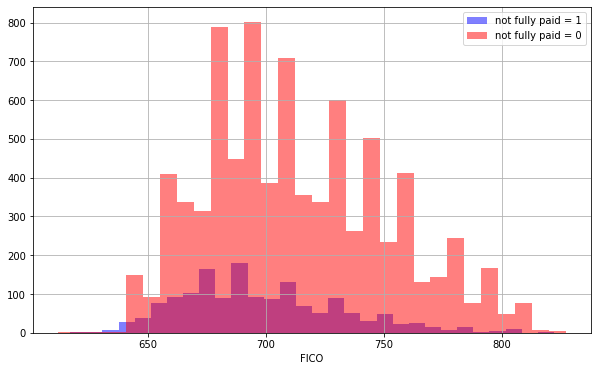

In [ ]:
# FICO distributions, grouped by our target not.fully.paid
plt.figure(figsize=(10,6))

loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',label='not fully paid = 1',bins=30)
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',label='not fully paid = 0',bins=30)

plt.legend()
plt.xlabel('FICO')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


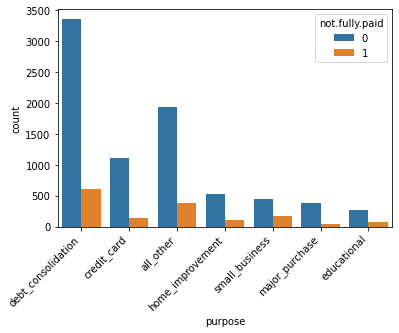

In [ ]:
# Bar visualizations for purpose feature grouped by our target feature
sns.countplot(loans['purpose'], hue=loans['not.fully.paid'])
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
# Verifying if there are null values or not
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
# Creating a list with categorical variables
cat_feats = ['purpose']

# Getting dummies and creating a new dataframe
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [ ]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Setting X and y
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Create Decision Tree

In [ ]:
# Create an instance of DecisionTreeClassifier() 
start_time = time.time()

decision_tree = DecisionTreeClassifier(criterion='entropy', max_features=1, max_depth=4)

# Fit the model
decision_tree.fit(X_train, y_train)

# Making predictions
predictions = decision_tree.predict(X_test)

print("--- Runtime: %s seconds ---" % (time.time() - start_time))

--- Runtime: 0.011345386505126953 seconds ---


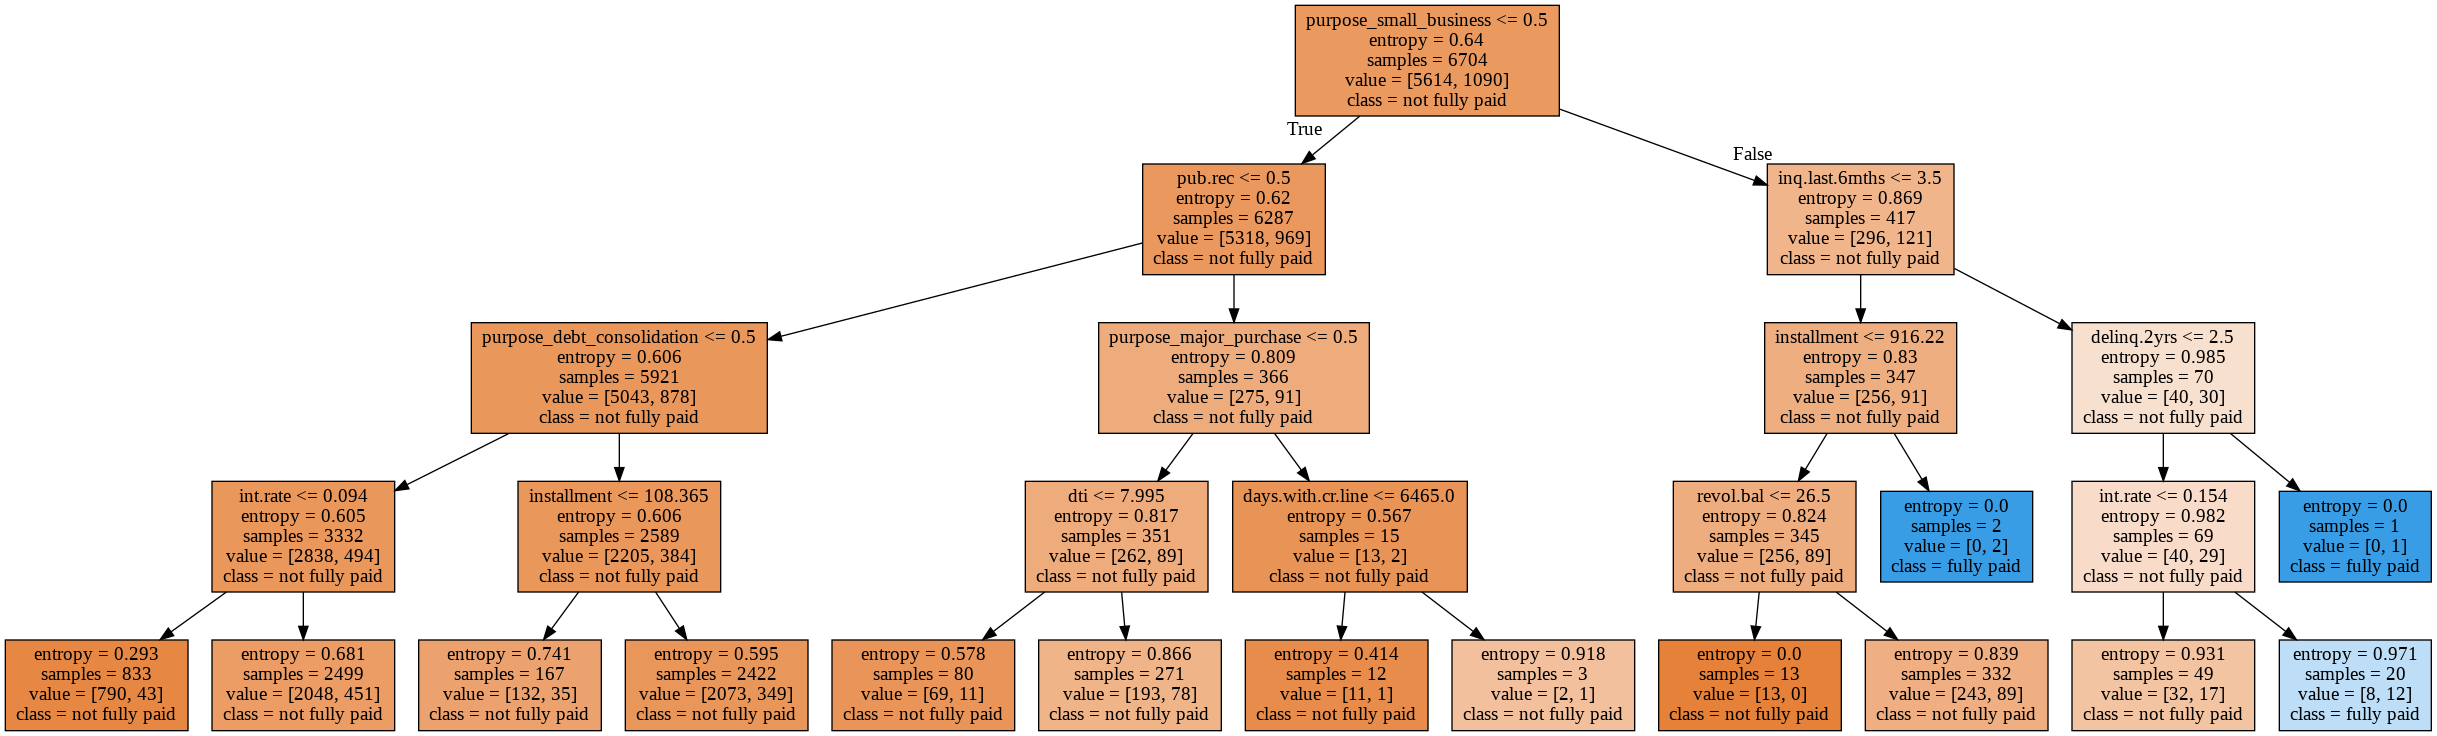

In [ ]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['not fully paid', 'fully paid'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.38      0.01      0.02       443

    accuracy                           0.84      2874
   macro avg       0.62      0.50      0.47      2874
weighted avg       0.78      0.84      0.78      2874



In [ ]:
print(confusion_matrix(y_test,predictions))

[[2423    8]
 [ 438    5]]


Create Random Forest Model

In [ ]:
# Setting start time to calculate runtime
start_time = time.time()

# Creating an instance of the RandomForestClassifier class
rfc = ensemble.RandomForestClassifier()

# If we add parameter n_estimators, runtime increases
# rfc = ensemble.RandomForestClassifier(n_estimators=50)

# Fitting the model
rfc.fit(X_train,y_train)

# Making predictions
predictionsrfc = rfc.predict(X_test)

print("--- Runtime: %s seconds ---" % (time.time() - start_time))

--- Runtime: 1.5528192520141602 seconds ---


Classification Report

In [ ]:
print(classification_report(y_test,predictionsrfc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.42      0.02      0.05       443

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



Confusion Matrix

In [ ]:
confusion_matrix(y_test,predictionsrfc)

array([[2416,   15],
       [ 432,   11]])

Conclusion

Based on runtime, Decision Tree was faster than Random Forest. 

Based on precision, recall and F1 scpre. Random Forest got better metrics tahn Decision Tree.